# Linear Regression Basics Using Premier League Football Data

### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

### Read the 2021-2022 Premier League Data

In [5]:
df = pd.read_csv('../DataSets/Prem_2021_2022.csv')

### Plot the Initial Relationships

Text(0, 0.5, 'Points Achieved')

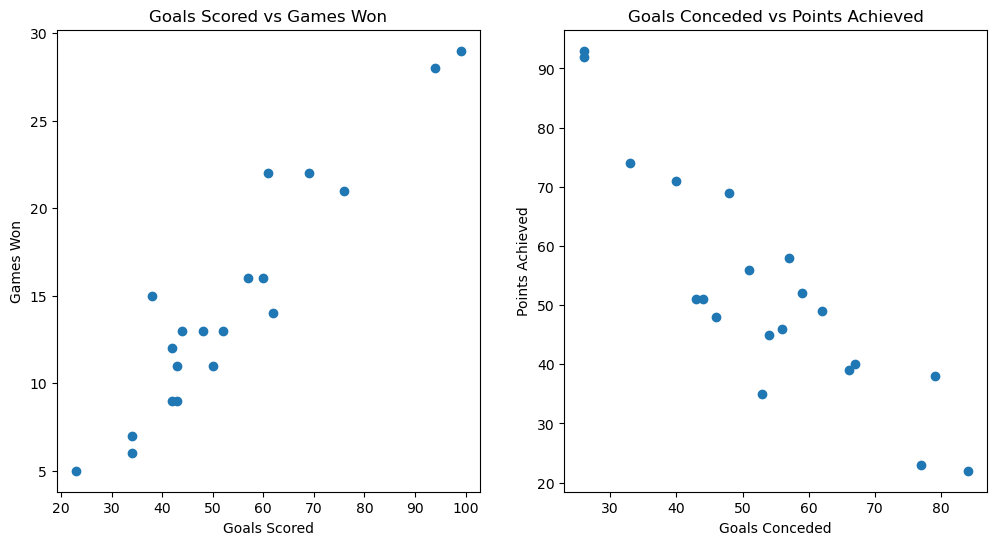

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(df['GoalsFor'], df['Won'])
axes[1].scatter(df['GoalsAgainst'], df['Points'])
axes[0].set_title('Goals Scored vs Games Won')
axes[1].set_title('Goals Conceded vs Points Achieved')
axes[0].set_xlabel('Goals Scored')
axes[0].set_ylabel('Games Won')
axes[1].set_xlabel('Goals Conceded')
axes[1].set_ylabel('Points Achieved')

### Calculate the Optimum Gradients for Y = aX + b

In [7]:
slopeGF, interceptGF, r_valueGF, p_valueGF, std_errGF = stats.linregress(df['GoalsFor'], df['Won'])
slopeGC, interceptGC, r_valueGC, p_valueGC, std_errGC = stats.linregress(df['GoalsAgainst'], df['Points'])

### Plot the Line of Best Fit and Residuals Over the Original Data

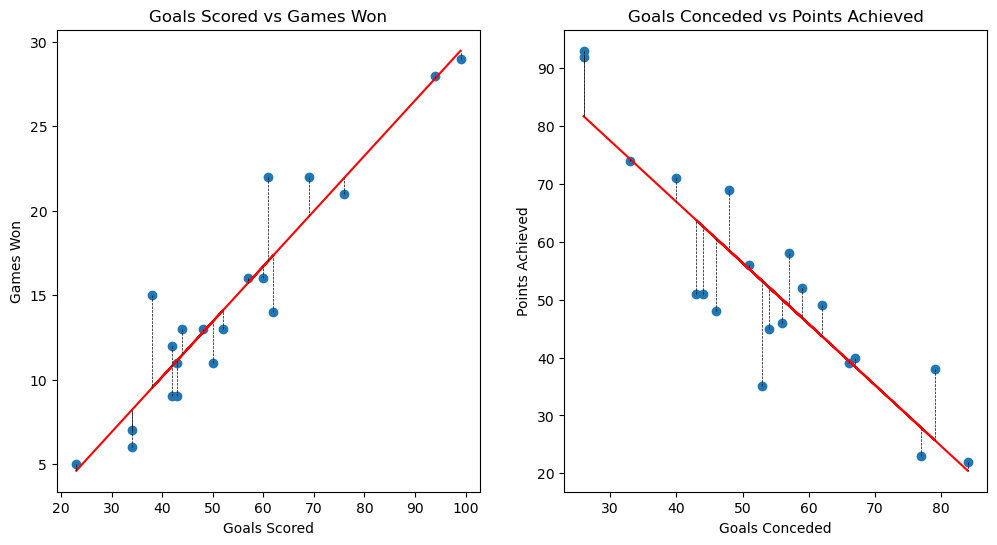

In [8]:
GF_predictions = slopeGF*df['GoalsFor']+interceptGF
GF_residuals = df['Won'] - GF_predictions
GC_predictions = slopeGC*df['GoalsAgainst']+interceptGC
GC_residuals = df['Points'] - GC_predictions

fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(df['GoalsFor'], df['Won'])
axes[1].scatter(df['GoalsAgainst'], df['Points'])
axes[0].set_title('Goals Scored vs Games Won')
axes[1].set_title('Goals Conceded vs Points Achieved')
axes[0].set_xlabel('Goals Scored')
axes[0].set_ylabel('Games Won')
axes[1].set_xlabel('Goals Conceded')
axes[1].set_ylabel('Points Achieved')
axes[0].plot(df['GoalsFor'], GF_predictions, color='red')
for x, y, res in zip(df['GoalsFor'], df['Won'], GF_residuals):
    axes[0].plot([x, x], [y, y - res], 'k--', lw=0.5)
axes[1].plot(df['GoalsAgainst'], GC_predictions, color='red')
for x, y, res in zip(df['GoalsAgainst'], df['Points'], GC_residuals):
    axes[1].plot([x, x], [y, y - res], 'k--', lw=0.5)

### Read 2022-2023 Premier League Data

We will use this data to check whether our line of best fit can predict the number of games won and points achieved when we input a specific number of goals scored and goals conceded.

In [12]:
df2 = pd.read_csv('../DataSets/Prem_2022_2023.csv')

### Plot the Line of Best Fit and Residuals Over the New Data

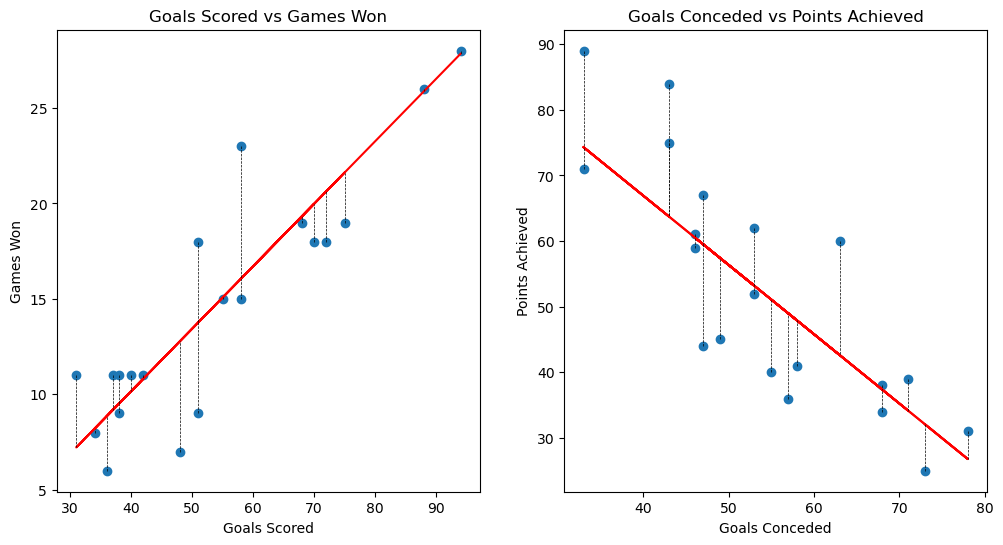

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(df2['GoalsFor'], df2['Won'])
axes[1].scatter(df2['GoalsAgainst'], df2['Points'])
axes[0].set_title('Goals Scored vs Games Won')
axes[1].set_title('Goals Conceded vs Points Achieved')
axes[0].set_xlabel('Goals Scored')
axes[0].set_ylabel('Games Won')
axes[1].set_xlabel('Goals Conceded')
axes[1].set_ylabel('Points Achieved')

GF_predictions = slopeGF*df2['GoalsFor']+interceptGF
GF_residuals = df2['Won'] - GF_predictions
GC_predictions = slopeGC*df2['GoalsAgainst']+interceptGC
GC_residuals = df2['Points'] - GC_predictions

axes[0].plot(df2['GoalsFor'], GF_predictions, color='red')
axes[1].plot(df2['GoalsAgainst'], GC_predictions, color='red')
for x, y, res in zip(df2['GoalsFor'], df2['Won'], GF_residuals):
    axes[0].plot([x, x], [y, y - res], 'k--', lw=0.5)
axes[1].plot(df2['GoalsAgainst'], GC_predictions, color='red')
for x, y, res in zip(df2['GoalsAgainst'], df2['Points'], GC_residuals):
    axes[1].plot([x, x], [y, y - res], 'k--', lw=0.5)

### Use the Model to Predict Manchester City Win Tally and Points Tally

In [34]:
man_city_goals_for = df2['GoalsFor'][df2['Team'] == 'Manchester City'][0]
man_city_wins = df2['Won'][df2['Team'] == 'Manchester City'][0]
man_city_goals_against = df2['GoalsAgainst'][df2['Team'] == 'Manchester City'][0]
man_city_points = df2['Points'][df2['Team'] == 'Manchester City'][0]

print('Manchester City Wins')
print(f'Actual: {man_city_wins}') 
print(f'Predicted: {round(man_city_goals_for*slopeGF+interceptGF, 1)}')
print('Manchester City Points')
print(f'Actual: {man_city_points}') 
print(f'Predicted: {round(man_city_goals_against*slopeGC+interceptGC, 1)}')

Manchester City Wins
Actual: 28
Predicted: 27.8
Manchester City Points
Actual: 89
Predicted: 74.3


### Visualise the Cost Function for the model of Goals For vs Games Won

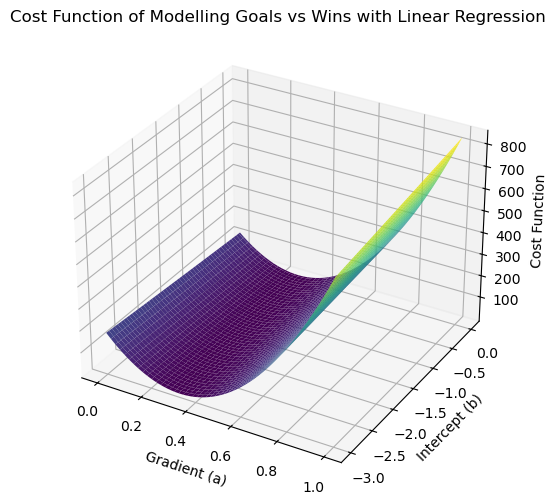

In [41]:
X = df['GoalsFor']
Y = df['Won']

# Define the cost function
def cost_function(X, Y, b, a):
    m = len(X)
    predicted_values = b + a * X
    squared_errors = (predicted_values - Y) ** 2
    return (1 / (2 * m)) * np.sum(squared_errors)

# Create a grid of slope (a) and intercept (b) values
a_values = np.linspace(0, 1, 100)
b_values = np.linspace(-3, 0, 100)
cost_values = np.zeros((len(b_values), len(a_values)))

for i, b in enumerate(b_values):
    for j, a in enumerate(a_values):
        cost_values[i, j] = cost_function(X, Y, b, a)

# Create a contour plot
a_grid, b_grid = np.meshgrid(a_values, b_values)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(a_grid, b_grid, cost_values, cmap='viridis')
ax.set_xlabel('Gradient (a)')
ax.set_ylabel('Intercept (b)')
ax.set_zlabel('Cost Function')
ax.set_title('Cost Function of Modelling Goals vs Wins with Linear Regression')
plt.show()
